<IPython.core.display.Javascript object>


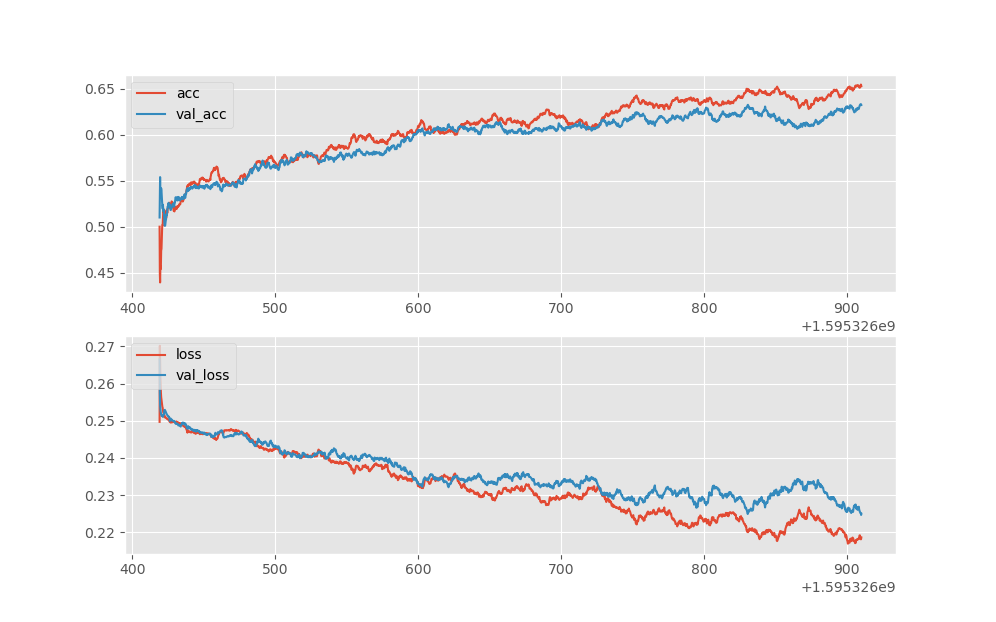

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib notebook

style.use("ggplot")

model_name = "model-1595326418" # grab whichever model name you want here. We could also just reference the MODEL_NAME if you're in a notebook still.

def create_acc_loss_graph(model_name):
    
    df = pd.read_csv("model_result.log") # find the model
    temp = df.name.str.contains(model_name)
    df = df[temp]
    
    alpha = .02
    df['train_acc_mva'] = df['acc'].ewm(alpha=alpha).mean()  # exponential weighted moving average
    df['train_loss_mva'] = df['loss'].ewm(alpha=alpha).mean()
    df['val_acc_mva'] = df['val_acc'].ewm(alpha=alpha).mean()
    df['val_loss_mva'] = df['val_loss'].ewm(alpha=alpha).mean()
    
    fig = plt.figure()

    ax1 = plt.subplot2grid((2,1), (0,0))
    ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1)


    ax1.plot(df['times'], df['train_acc_mva'], label="acc")
    ax1.plot(df['times'], df['val_acc_mva'], label="val_acc")
    ax1.legend(loc=2)
    ax2.plot(df['times'],df['train_loss_mva'], label="loss")
    ax2.plot(df['times'],df['val_loss_mva'], label="val_loss")
    ax2.legend(loc=2)
    plt.show()

create_acc_loss_graph(model_name)